In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [63]:
df= pd.read_csv(r"C:\Users\Robin\Downloads\results_imputation.csv")
df = pd.read_csv(r"C:\Users\Robin\Downloads\results_imputation_updated_2.csv")
df = df.loc[~df["model"].isin(["GAIN", "SSSDS4"])]
df.model.replace({"Simple_Diffusion": "Diffusion", "RNN": "GRU-D", "BRNN":"M4IP"}, inplace=True)
df.data_dir.replace({"../data/eicu": "eICU", "../data/miiv": "MIMIC-IV", "../data/hirid":"HiRID"}, inplace=True)

In [64]:
df.drop(columns=[col for col in df if col not in ["model","avg.rmse", "avg.mae", "avg.rmse", "avg.jsd", "std.mae", "std.jsd","std.rmse", "data_dir", "ImputationDataset.mask_proportion", "ImputationDataset.mask_method"]], inplace=True)

In [66]:
df.head(50)

,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,model,ImputationDataset.mask_method,ImputationDataset.mask_proportion,data_dir
0,108.922087,0.006574,0.000451,9.929536,0.001198,0.000066,Attention,MCAR,0.3,NaN
1,6.087111,0.008025,0.000753,7.776867,0.002548,0.000469,CSDI,MCAR,0.3,NaN
2,134.485405,0.038082,0.004144,4.879338,0.001241,0.000130,Attention,MCAR,0.3,NaN
3,284.676188,0.038215,0.003731,11.195988,0.003594,0.000256,Attention,MCAR,0.7,NaN
4,4.911884,0.041573,0.004719,1.696708,0.002061,0.000340,CSDI,MCAR,0.3,NaN
5,59.810889,0.050834,0.005850,6.495227,0.004611,0.000830,Attention,MAR,0.3,HiRID
6,60.635006,0.052249,0.006048,8.485724,0.006049,0.001113,SAITS,MAR,0.3,HiRID
7,302.866946,0.054684,0.006090,7.896474,0.001090,0.000136,BRITS,MCAR,0.3,NaN
8,116.766776,0.054813,0.006888,2.127506,0.000854,0.000117,SAITS,MCAR,0.3,HiRID
9,153.572507,0.055632,0.006399,5.114115,0.001287,0.000126,BRITS,MCAR,0.3,NaN


In [157]:
mnar = df.loc[df["ImputationDataset.mask_method"]=="MNAR"]
# mnar = mnar.loc[mnar["ImputationDataset.mask_proportion"]==0.5]
# mnar = mnar.loc[mnar["model"] not in["GAIN", "SSSDS4"]]

In [252]:
mnar_mean = mnar.groupby("model").mean()
mnar_mean = mnar_mean.reset_index()

C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\3397736999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mnar_mean = mnar.groupby("model").mean()


In [253]:
mnar_mean.plot.bar(y="avg.mae" ,x=["model","ImputationDataset.mask_proportion"], yerr="std.mae")

ValueError: x must be a label or position

<Axes: ylabel='model'>

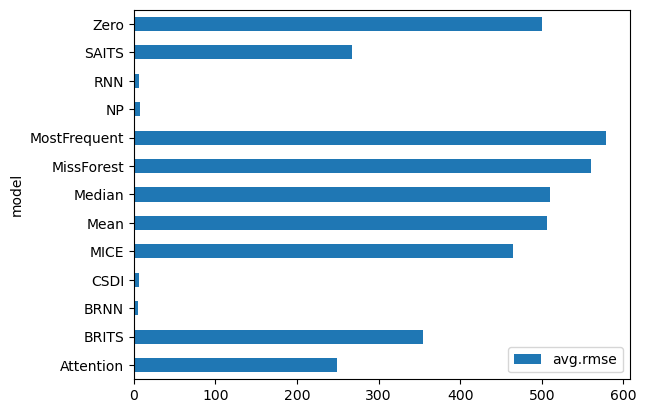

In [116]:
mnar_mean.plot.barh(y="avg.rmse")

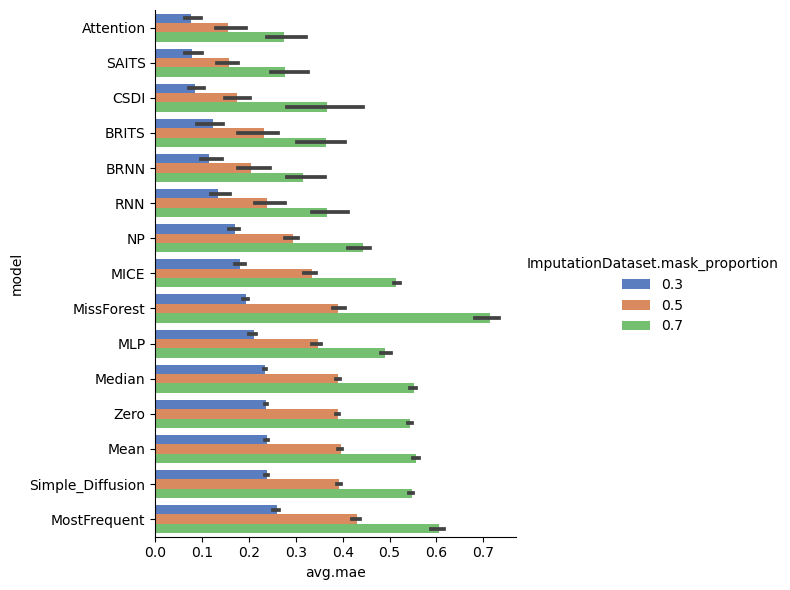

In [138]:
g = sns.catplot(x="avg.mae",y="model", hue="ImputationDataset.mask_proportion", data=mnar,
                height=6, kind="bar", palette="muted", orient="h")
# extract the matplotlib axes_subplot objects from the FacetGrid
# for ax in g.axes.ravel():
#     # iterate through the containers (bars)
#     for c in ax.containers:
#         # customize labels to not include values below a specific number
#         labels = [f' {w:0.2f}' if (w := v.get_width()) > 0 else '' for v in c]
#         # add the labels
#         ax.bar_label(c, labels=labels,fontsize=7,label_type="center")

In [159]:
df["data_dir"]

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
683    ../data/miiv
684    ../data/eicu
685    ../data/miiv
687             NaN
688    ../data/miiv
Name: data_dir, Length: 606, dtype: object

In [189]:
dataset = df.loc[df["data_dir"]=="../data/eicu"]
dataset = dataset.groupby(["model", "ImputationDataset.mask_method"]).mean()
dataset = dataset.reset_index()

C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\2816346500.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset = dataset.groupby(["model", "ImputationDataset.mask_method"]).mean()


In [187]:
dataset["y_lower"]

,model,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,Tags,Runtime,Attention.d_inner,...,trainer/global_step,val/AUC,val/AUC/1111,val/PR,val/PR/1111,val/jsd,val/loss,val/loss/1111,val/mae,val/rmse
0,Attention,412.485547,0.157449,0.021401,23.361917,0.010071,0.002353,NaN,60728.583333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRITS,625.791515,0.274472,0.057040,24.453090,0.010975,0.003062,NaN,39538.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CSDI,5.119744,0.172363,0.022464,1.357339,0.022329,0.004112,NaN,65981.750000,NaN,...,13380.666667,NaN,NaN,NaN,NaN,NaN,0.055036,NaN,NaN,NaN
3,Diffusion,8.387024,0.373340,0.128803,0.093898,0.002988,0.003713,NaN,9106.333333,NaN,...,4588.333333,NaN,NaN,NaN,NaN,0.127476,0.482623,NaN,0.373657,8.382364
4,GRU-D,5.644942,0.222438,0.040663,0.166370,0.006694,0.003580,NaN,11175.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M4IP,4.851137,0.188042,0.030471,0.177958,0.006579,0.003519,NaN,21583.083333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MICE,750.667061,0.338965,0.112531,17.004786,0.005791,0.003992,NaN,3636.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MLP,7.317954,0.319894,0.117041,0.095064,0.004992,0.004906,NaN,2407.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Mean,801.158848,0.373410,0.177786,13.939696,0.005082,0.010269,NaN,1772.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Median,809.542065,0.369435,0.087705,15.650595,0.005551,0.006691,NaN,2110.083333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()

In [235]:
np.random.rand(3,15)

array([[0.4328177 , 0.67340988, 0.8207924 , 0.8261555 , 0.78945418,
        0.14099314, 0.74204708, 0.28477038, 0.71412268, 0.83427892,
        0.33436901, 0.19264212, 0.21389787, 0.45624949, 0.15538015],
       [0.91128647, 0.85396677, 0.90222923, 0.41348097, 0.43417947,
        0.89179075, 0.08920838, 0.72137177, 0.65595741, 0.82490173,
        0.58468969, 0.56849561, 0.75906249, 0.81508966, 0.41450947],
       [0.65711218, 0.24162942, 0.72328101, 0.24353234, 0.87554287,
        0.4468355 , 0.71088759, 0.7615182 , 0.06139767, 0.2440234 ,
        0.53501723, 0.69577787, 0.04636405, 0.24809354, 0.89512523]])

In [256]:
mnar

,Name,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,model,State,Notes,...,trainer/global_step,val/AUC,val/AUC/1111,val/PR,val/PR/1111,val/jsd,val/loss,val/loss/1111,val/mae,val/rmse
17,lively-sweep-132,66.437651,0.063100,0.007290,5.141578,0.004811,0.000777,Attention,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,wise-sweep-121,67.275995,0.063938,0.007386,5.928646,0.004074,0.000766,SAITS,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,twilight-sweep-203,270.067563,0.070449,0.008327,13.898127,0.003378,0.000509,Attention,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,peach-sweep-126,272.657762,0.071541,0.008391,14.776616,0.003715,0.000561,SAITS,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,CSDI,2.927526,0.072087,0.008311,0.175495,0.002776,0.000430,CSDI,finished,-,...,7328.0,NaN,NaN,NaN,NaN,NaN,0.049502,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,worthy-sweep-191,318.567543,0.614010,0.071593,13.625457,0.028543,0.014179,MostFrequent,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,sweet-sweep-169,648.121213,0.615585,0.073266,16.403037,0.015871,0.007696,MostFrequent,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,scarlet-sweep-185,1248.551050,0.683073,0.088467,105.320695,0.064523,0.008649,MissForest,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,wise-sweep-174,753.951279,0.729535,0.088994,98.854933,0.100105,0.014138,MissForest,finished,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


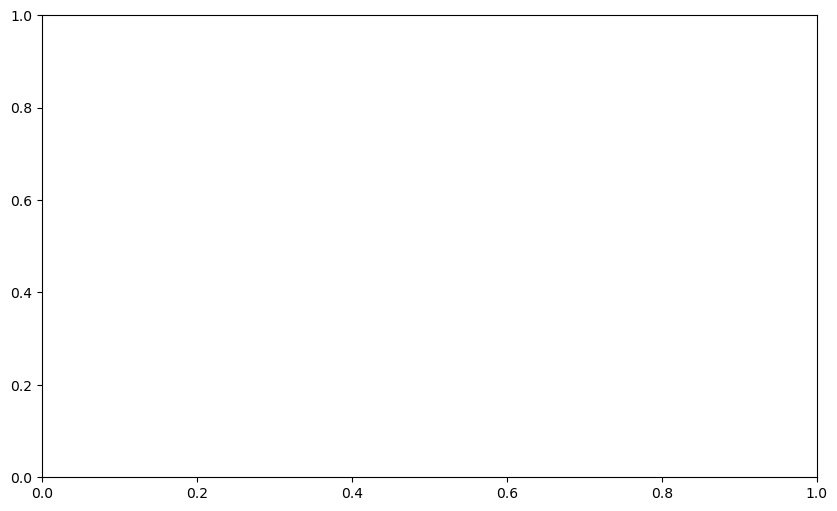

In [257]:
fig, ax = plt.subplots(figsize=(10, 6))

C:\Users\Robin\miniconda\envs\yaib_15\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


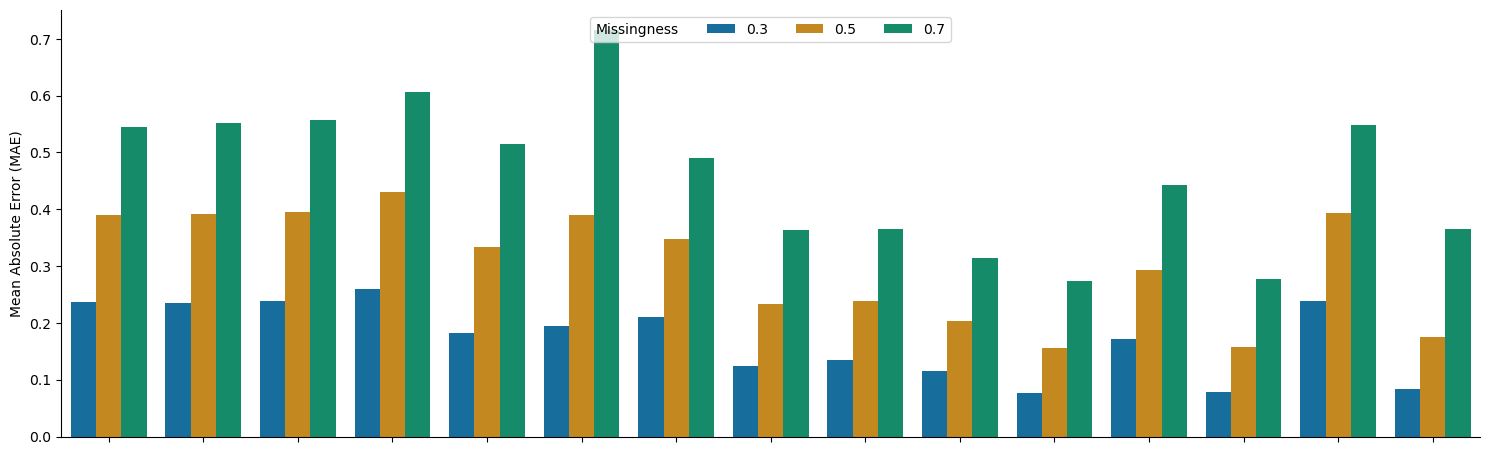

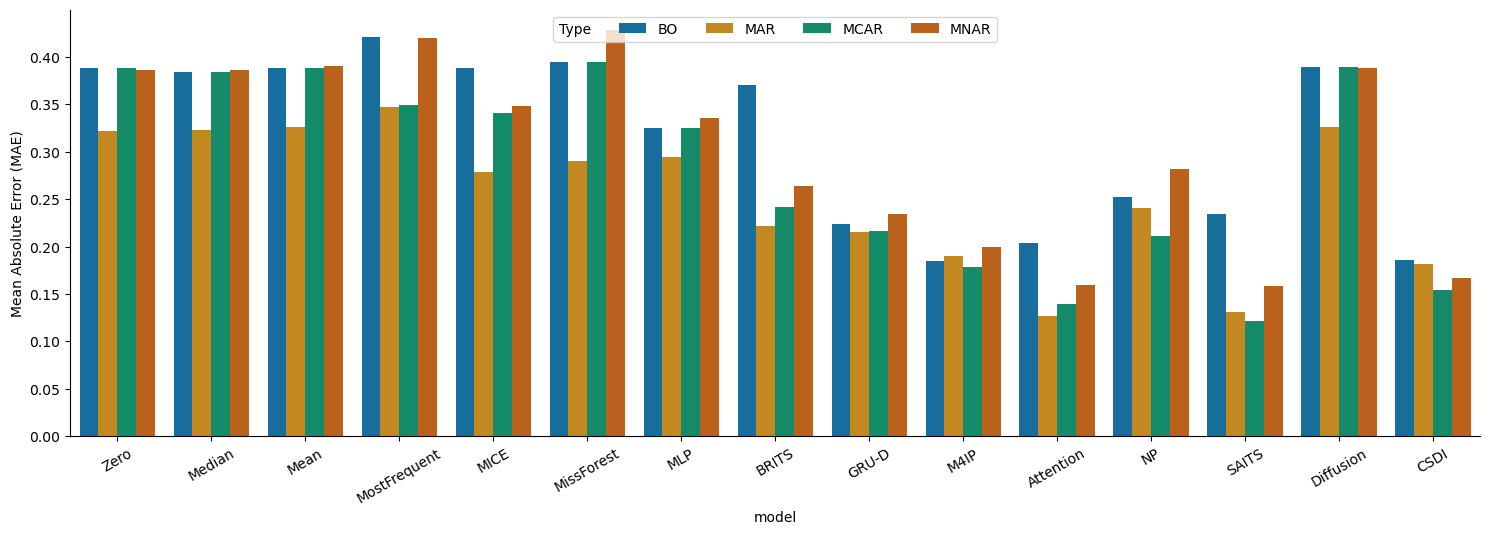

In [259]:
metric = "avg.mae"
order = ["Zero", "Median","Mean", "MostFrequent", "MICE", "MissForest","MLP", "BRITS", "GRU-D", "M4IP", "Attention", "NP","SAITS","Diffusion", "CSDI"]
g = sns.catplot(y="avg.mae", x="model", hue="ImputationDataset.mask_proportion", data=mnar, ax=ax,
                height=5, kind="bar", palette="colorblind", orient="v", log=False, legend=False,aspect=3, order=order, )
legend = plt.legend(loc="upper center", ncol=len(mnar["ImputationDataset.mask_proportion"].unique()), title="Missingness", )#bbox_to_anchor=(0.5,1.1), alignment="left")
legend_title_left(legend)
g.set(xlabel="")
g.set_xticklabels("")
g.set_ylabels("Root Mean Squared Error (RMSE)")
g.set_ylabels("Mean Absolute Error (MAE)")
g.set_xticklabels(rotation=30)
mnar["std.mae"].plot(ax=ax)
# plt.errorbar(x = x, y = df['average'],
#             yerr=df['sd'], fmt='none', c= 'black', capsize = 2)
g.savefig(r"C:\Users\Robin\Downloads\results_imputation_mnar.pdf", bbox_inches='tight')
metric = "avg.mae"
g = sns.catplot(y="avg.mae",x="model", hue="ImputationDataset.mask_method", data=dataset,
                height=5, kind="bar", palette="colorblind", orient="v", log=False, legend=False, aspect=3, order=order)
legend = plt.legend(loc="upper center", ncol=len(df["ImputationDataset.mask_method"].unique()), title="Type",) #bbox_to_anchor=(0.5,1.1))
legend_title_left(legend)
g.set_ylabels("Root Mean Squared Error (RMSE)")
g.set_ylabels("Mean Absolute Error (MAE)")
g.set_xticklabels(rotation=30)
g.savefig(r"C:\Users\Robin\Downloads\results_imputation_missingness_method.pdf", bbox_inches='tight')


Attention
                  Name    avg.rmse   avg.mae   avg.jsd   std.rmse   std.mae  \
17    lively-sweep-132   66.437651  0.063100  0.007290   5.141578  0.004811   
25  twilight-sweep-203  270.067563  0.070449  0.008327  13.898127  0.003378   
50   ancient-sweep-118  196.084531  0.097853  0.012579   8.532065  0.004495   

     std.jsd      model     State Notes  ... trainer/global_step  val/AUC  \
17  0.000777  Attention  finished     -  ...                 NaN      NaN   
25  0.000509  Attention  finished     -  ...                 NaN      NaN   
50  0.000903  Attention  finished     -  ...                 NaN      NaN   

   val/AUC/1111  val/PR val/PR/1111  val/jsd  val/loss  val/loss/1111  \
17          NaN     NaN         NaN      NaN       NaN            NaN   
25          NaN     NaN         NaN      NaN       NaN            NaN   
50          NaN     NaN         NaN      NaN       NaN            NaN   

    val/mae  val/rmse  
17      NaN       NaN  
25      NaN       NaN  

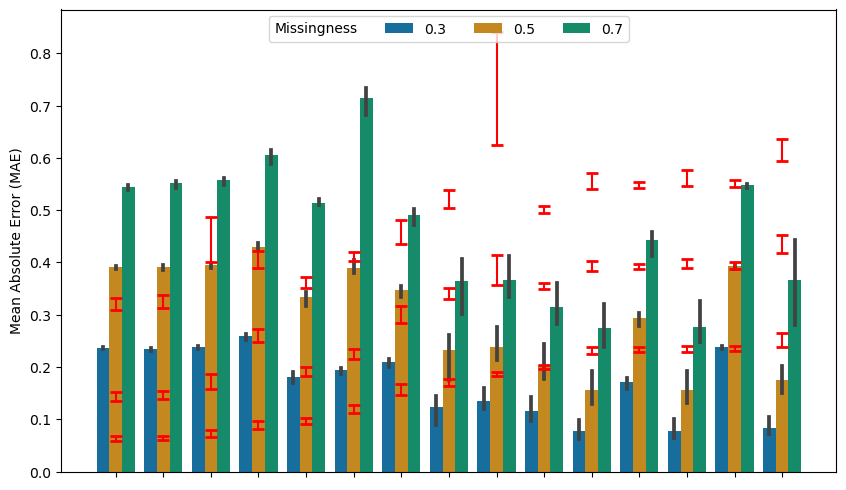

In [274]:
fig, ax = plt.subplots(figsize=(10, 6))
metric = "avg.mae"
order = ["Zero", "Median","Mean", "MostFrequent", "MICE", "MissForest","MLP", "BRITS", "GRU-D", "M4IP", "Attention", "NP","SAITS","Diffusion", "CSDI"]
g = sns.barplot(y="avg.mae", x="model",ax=ax, hue="ImputationDataset.mask_proportion", data=mnar, palette="colorblind", orient="v", order=order)
legend = plt.legend(loc="upper center", ncol=len(mnar["ImputationDataset.mask_proportion"].unique()), title="Missingness", )#bbox_to_anchor=(0.5,1.1), alignment="left")
legend_title_left(legend)
g.set(xlabel="")
g.set_xticklabels("")
g.set_ylabel("Root Mean Squared Error (RMSE)")
g.set_ylabel("Mean Absolute Error (MAE)")
# mnar.plot(x="model",y="std.mae",ax=ax, kind="bar", color="black", legend=False)
for category in mnar["model"].unique():
    error_data = mnar[mnar["model"] == category]
    print(category)
    print(group_data)
    for i, group in enumerate(error_data["ImputationDataset.mask_proportion"].unique()):
        group_data = error_data[error_data["ImputationDataset.mask_proportion"] == group]
        # print(i)
        # print(group)
        g.errorbar(
            x=category, y=group_data[metric].iloc[i], yerr=group_data["std.mae"].mean(),
            fmt='none', color='red', capsize=4, capthick=2, barsabove=True
        )
# g.set_xticklabels(rotation=30)
# g.figure.savefig(r"C:\Users\Robin\Downloads\results_imputation_mnar.pdf", bbox_inches='tight')
# metric = "avg.mae"
# g = sns.catplot(y="avg.mae",x="model", hue="ImputationDataset.mask_method", data=dataset,
#                 height=5, kind="bar", palette="colorblind", orient="v", log=False, legend=False, aspect=3, order=order)
# legend = plt.legend(loc="upper center", ncol=len(df["ImputationDataset.mask_method"].unique()), title="Type",) #bbox_to_anchor=(0.5,1.1))
# legend_title_left(legend)
# g.set_ylabels("Root Mean Squared Error (RMSE)")
# g.set_ylabels("Mean Absolute Error (MAE)")
# g.set_xticklabels(rotation=30)
# g.savefig(r"C:\Users\Robin\Downloads\results_imputation_missingness_method.pdf", bbox_inches='tight')

In [194]:
dataset

,model,ImputationDataset.mask_method,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,Tags,Runtime,...,trainer/global_step,val/AUC,val/AUC/1111,val/PR,val/PR/1111,val/jsd,val/loss,val/loss/1111,val/mae,val/rmse
0,Attention,BO,485.285229,0.204177,0.029907,30.292760,0.018700,0.005418,NaN,58619.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Attention,MAR,372.571277,0.126440,0.016688,31.843693,0.011681,0.001925,NaN,65594.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Attention,MCAR,373.574652,0.139628,0.017437,4.027849,0.000741,0.000118,NaN,61885.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Attention,MNAR,418.511029,0.159551,0.021572,27.283364,0.009163,0.001952,NaN,56815.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRITS,BO,786.418815,0.370720,0.112132,8.169977,0.002786,0.003525,NaN,38231.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BRITS,MAR,554.740461,0.221633,0.035705,43.213548,0.018499,0.003056,NaN,41408.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BRITS,MCAR,557.887283,0.241313,0.037371,14.416698,0.007147,0.001662,NaN,37884.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BRITS,MNAR,604.119502,0.264222,0.042953,32.012137,0.015465,0.004006,NaN,40628.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CSDI,BO,5.034651,0.186122,0.024899,0.558780,0.002575,0.000450,NaN,73241.666667,...,14972.000000,NaN,NaN,NaN,NaN,NaN,0.055229,NaN,NaN,NaN
9,CSDI,MAR,6.385178,0.181656,0.025434,4.131361,0.075430,0.014467,NaN,67385.000000,...,13923.000000,NaN,NaN,NaN,NaN,NaN,0.048083,NaN,NaN,NaN


ValueError: `errorbar` must be a callable, string, or (string, number) tuple

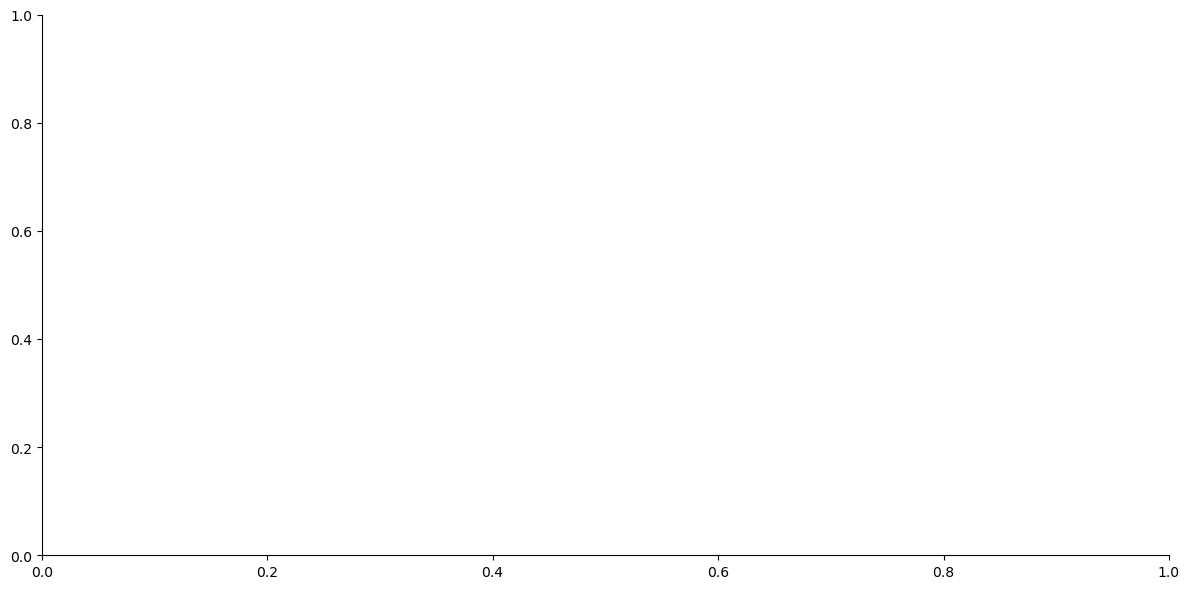

In [227]:
metric = "avg.mae"
g = sns.catplot(y="avg.mae",x="model", hue="ImputationDataset.mask_method", data=df,
                height=6, kind="bar", palette="colorblind", orient="v", log=False, legend=False, aspect=2,errorbar=df["std.mae"], order=["Zero", "Median","Mean", "MostFrequent", "MICE", "MissForest","MLP", "BRITS", "RNN", "BRNN", "Attention", "NP","SAITS","Simple_Diffusion", "CSDI"])
plt.legend(loc="upper center", ncol=len(df["ImputationDataset.mask_method"].unique()), title="Missingness", bbox_to_anchor=(0.5,1.1))
g.set_ylabels("Root Mean Squared Error (RMSE)")
g.set_ylabels("Mean Absolute Error (MAE)")
g.set_xticklabels(rotation=30 )

In [91]:
miss_df = df.groupby("model").mean()

C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\3353128530.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  miss_df = df.groupby("model").mean()


In [98]:
miss_df

,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,Runtime,ImputationDataset.mask_proportion
model,,,,,,,,
Attention,256.048537,0.162105,0.022155,12.199610,0.007705,0.001768,26000.675676,0.500000
BRITS,354.488043,0.235388,0.044106,13.909530,0.008933,0.002420,19391.157895,0.500000
BRNN,5.486480,0.192210,0.030961,0.194887,0.006635,0.003243,11451.650000,0.500000
CSDI,9.828122,0.224374,0.029048,6.194864,0.068764,0.008197,32231.289474,0.505263
GAIN,1852.542788,1.404994,0.109369,251.533844,0.165821,0.013230,1238.243243,0.494595
MICE,466.552260,0.335164,0.107704,12.175502,0.006803,0.004190,1797.846154,0.494872
Mean,503.029806,0.377116,0.174030,10.099926,0.006361,0.009107,854.447368,0.500000
Median,497.713005,0.373644,0.088281,11.131934,0.007162,0.008082,991.694444,0.500000
MissForest,504.547131,0.387488,0.065048,31.120079,0.028346,0.009706,4281.142857,0.505714


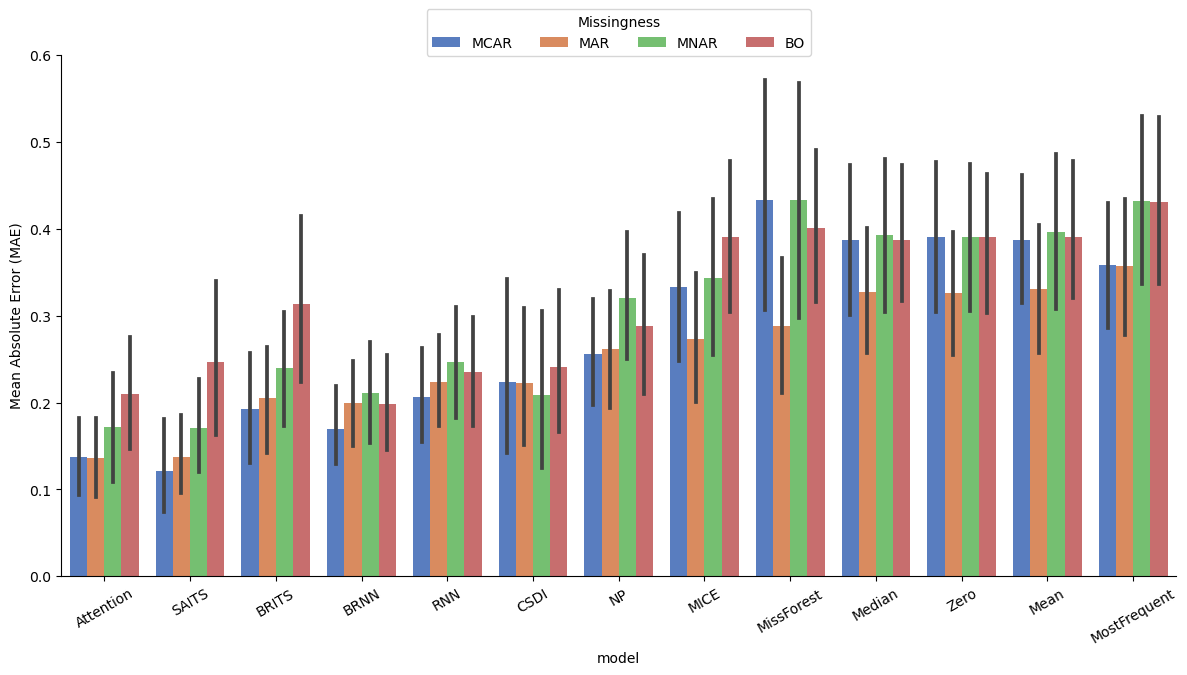

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (16,) and arg 1 with shape (41,).

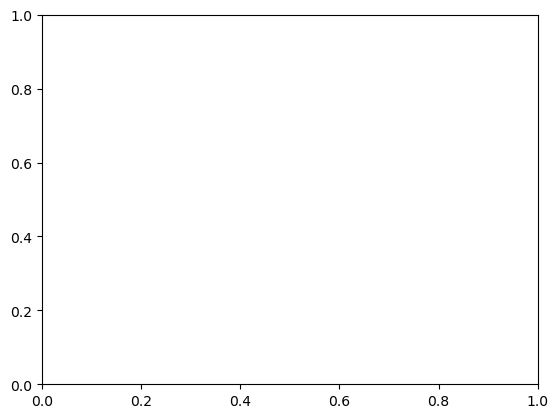

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' with columns 'group', 'value', and 'error'
# 'group' represents the different groups for the bars
# 'value' represents the height of the bars
# 'error' represents the standard deviation for each group

# Example DataFrame creation
# data = {
#     'group': ['Group A', 'Group A', 'Group B', 'Group B'],
#     'value': [10, 12, 8, 11],
#     'error': [1, 2, 0.5, 1.5]
# }
# df = pd.DataFrame(data)

# Grouped bar chart with custom error bars
fig, ax = plt.subplots()

# Set the bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(df['model'].unique()))

# Plot bars with error bars
for i, group in enumerate(df['model'].unique()):
    group_data = df[df['model'] == group]
    ax.bar(
        bar_positions + i * bar_width,
        group_data['avg.mae'],
        bar_width,
        label=group,
        yerr=group_data['std.mae'],
        capsize=5,  # cap size for error bars
        alpha=0.7  # transparency of bars
    )

# Set labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart with Custom Error Bars')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions + (len(df['model'].unique()) - 1) * bar_width / 2)
ax.set_xticklabels(df['model'].unique())

# Add legend
ax.legend()

# Show the plot
plt.show()

C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\3632711943.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = model_data.groupby(column).mean()
C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\3632711943.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = model_data.groupby(column).mean()
C:\Users\Robin\AppData\Local\Temp\ipykernel_28648\3632711943.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

ValueError: The number of FixedLocator locations (64), usually from a call to set_ticks, does not match the number of labels (16).

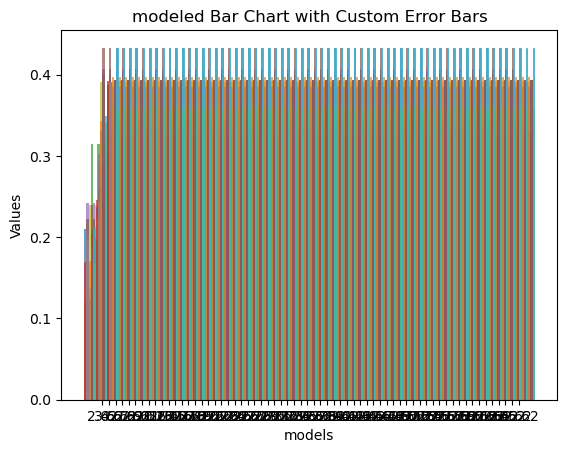

In [304]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' with columns 'group', 'value', and 'error'
# 'group' represents the different groups for the bars
# 'value' represents the height of the bars
# 'error' represents the standard deviation for each group

# Example DataFrame creation
# data = {
#     'group': ['Group A', 'Group A', 'Group B', 'Group B'],
#     'value': [10, 12, 8, 11],
#     'error': [1, 2, 0.5, 1.5]
# }
# df = pd.DataFrame(data)

# Grouped bar chart with custom error bars
fig, ax = plt.subplots()

# Set the bar width and positions
bar_width = 0.35
column = "ImputationDataset.mask_method"
bar_positions = np.arange(len(df['model'].unique())*len(df[column].unique()))
value = "avg.mae"
error = "std.mae"
# Plot bars with error bars
for i, model in enumerate(df['model'].unique()):
    grouped.reset_index(inplace=True)
    model_data = df[df['model'] == model]
    grouped = model_data.groupby(column).mean()
    grouped.reset_index(inplace=True)
    for item in grouped[column].unique():
        # print(item)
        # test = model_data[model_data[column]==item]
        test = grouped[grouped[column]==item][value]
        ax.bar(
            bar_positions + i * bar_width,
            test,
            bar_width,
            label=model,
            #yerr=model_data[error],
            capsize=5,  # cap size for error bars
            alpha=0.7  # transparency of bars
        )

# Set labels and title
ax.set_xlabel('models')
ax.set_ylabel('Values')
ax.set_title('modeled Bar Chart with Custom Error Bars')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions + (len(df['model'].unique()) - 1) * bar_width / 2)
ax.set_xticklabels(df['model'].unique())

# Add legend
ax.legend()

# Show the plot
plt.show()

In [305]:

import plotly.express as px

In [8]:
df = df[df['model'].notnull()]
df = df[df["ImputationDataset.mask_method"].notnull()]

In [331]:
# df

,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,model,ImputationDataset.mask_method,ImputationDataset.mask_proportion,data_dir
0,108.922087,0.006574,0.000451,9.929536,0.001198,0.000066,Attention,MCAR,0.3,NaN
1,6.087111,0.008025,0.000753,7.776867,0.002548,0.000469,CSDI,MCAR,0.3,NaN
2,134.485405,0.038082,0.004144,4.879338,0.001241,0.000130,Attention,MCAR,0.3,NaN
3,284.676188,0.038215,0.003731,11.195988,0.003594,0.000256,Attention,MCAR,0.7,NaN
4,4.911884,0.041573,0.004719,1.696708,0.002061,0.000340,CSDI,MCAR,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...
682,NaN,NaN,NaN,NaN,NaN,NaN,MostFrequent,MCAR,0.3,../data/miiv
683,NaN,NaN,NaN,NaN,NaN,NaN,MICE,MCAR,0.3,../data/miiv
684,NaN,NaN,NaN,NaN,NaN,NaN,SAITS,MCAR,0.3,../data/eicu
685,NaN,NaN,NaN,NaN,NaN,NaN,MICE,MCAR,0.3,../data/miiv


In [20]:
import plotly.io as pio

In [43]:
import plotly.graph_objects as go
mnar = df.loc[df["ImputationDataset.mask_method"]=="MNAR"]
order = ["Zero", "Median","Mean", "MostFrequent", "MICE", "MissForest","MLP", "BRITS", "GRU-D", "M4IP", "Attention", "NP","SAITS","Diffusion", "CSDI"]


In [ ]:
# dataframe = pd.DataFrame({"name":["foo", "bar"]*2, "x":["A", "A", "B", "B"], "y":[5, 6, 7, 8]})
data = df
# data = mnar
x="model"
# y="avg.mae"
# y_err = "std.mae"
y="avg.rmse"
y_err = "std.rmse"
# group = "ImputationDataset.mask_method"
# group = "ImputationDataset.mask_proportion"
legend_title_text='Missingness type'
legend_title_text='Missingness proportion'
margin=dict(l=50, r=10, t=10, b=50)

In [156]:
x="model"
y="avg.rmse"
y_err = "std.rmse"
labels={"avg.rmse": "Root Mean Squared Error (RMSE)","model": "Model"}
metric="rmse"
log_y=True
range_y=[0.01,1000]

In [154]:
x="model"
y="avg.mae"
y_err = "std.mae"
labels={"avg.mae": "Mean Absolute Error (MAE)","model": "Model"}
metric="mae"
log_y=False
range_y=[0,0.85]

In [151]:
x="model"
y="avg.jsd"
y_err = "std.jsd"
labels={"avg.jsd": "Jensen Shannon Divergence (JSD)","model": "Model"}
metric="jsd"
log_y=False
range_y=[0,0.35]

In [157]:

group = "ImputationDataset.mask_proportion"
margin=dict(l=50, r=10, t=20, b=10)
legend_title_text='Missingness proportion'
save_path=rf"C:\Users\Robin\Downloads\results_imputation_missingness_amount_plotly_{metric}.pdf"

plot_results(mnar, group,x,y,y_err,legend_title_text, margin, order, x_labels=False, labels=labels, save_path=save_path, log_y=log_y,range_y=range_y)

group = "ImputationDataset.mask_method"
margin=dict(l=50, r=10, t=20, b=10)
legend_title_text='Missingness type'
save_path=rf"C:\Users\Robin\Downloads\results_imputation_missingness_method_plotly_{metric}.pdf"
plot_results(df, group,x,y,y_err,legend_title_text, margin, order, x_labels=False, labels=labels, save_path=save_path, log_y=log_y,range_y=range_y)

group = "data_dir"
margin=dict(l=50, r=10, t=20, b=50)
legend_title_text='Dataset'
save_path = rf"C:\Users\Robin\Downloads\results_imputation_missingness_dataset_plotly_{metric}.pdf"
plot_results(df, group,x,y,y_err,legend_title_text, margin, order, x_labels=True, labels=labels, save_path=save_path, log_y=log_y,range_y=range_y)



In [139]:


def plot_results(data,group,x,y,y_err,legend_title, margin, order, x_labels=True, labels={"avg.mae": "Mean Absolute Error (MAE)","model": "Model"}, save_path=None, log_y=False, range_y=[0,0.85]):
    grouped = data.groupby([x, group]).agg("mean", numeric_only=True)
    grouped.reset_index(inplace=True)
    grouped.set_index(x,inplace=True)
    grouped = grouped.loc[order]
    grouped.reset_index(inplace=True)
    grouped["ImputationDataset.mask_proportion"] = grouped["ImputationDataset.mask_proportion"].astype(str)
    figure = px.bar(
        grouped,
        x=x,
        y=y,
        color=group,
        barmode='group',
        #category_orders={x:order})
        error_y=grouped[y_err],
        labels=labels,
        log_y=log_y,
        range_y=range_y
        )
    if not x_labels:
        figure.update_xaxes(showticklabels=False, title=None)
    figure.update_xaxes(showgrid=True)
    figure.update_yaxes(showgrid=True)
    figure.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.95,
        xanchor="right",
        x=1),
        font=dict(
            family="Arial",
            size=16,  # Set the font size here
        ),
        legend_title_text= legend_title, #'Dataset',
        # legend_title_text='Missingness proportion',
        # margin=dict(l=50, r=10, t=0, b=0))
        # margin=dict(l=50, r=10, t=10, b=50))
        margin=margin)
    figure.show()
    if save_path:
        figure.write_image(save_path)

# legend_title_text='Missingness proportion')
# figure.layout.update(
#     autosize=False,
#     width=500,
#     height=500
# )
# fig.update_xaxes(categoryorder='array', categoryarray= )

In [21]:
px.defaults.width = 1200
px.defaults.height = 400
pio.templates.default = "simple_white"

In [95]:
df

,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd,model,ImputationDataset.mask_method,ImputationDataset.mask_proportion,data_dir
0,108.922087,0.006574,0.000451,9.929536,0.001198,0.000066,Attention,MCAR,0.3,NaN
1,6.087111,0.008025,0.000753,7.776867,0.002548,0.000469,CSDI,MCAR,0.3,NaN
2,134.485405,0.038082,0.004144,4.879338,0.001241,0.000130,Attention,MCAR,0.3,NaN
3,284.676188,0.038215,0.003731,11.195988,0.003594,0.000256,Attention,MCAR,0.7,NaN
4,4.911884,0.041573,0.004719,1.696708,0.002061,0.000340,CSDI,MCAR,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...
683,NaN,NaN,NaN,NaN,NaN,NaN,MICE,MCAR,0.3,MIMIC-IV
684,NaN,NaN,NaN,NaN,NaN,NaN,SAITS,MCAR,0.3,eICU
685,NaN,NaN,NaN,NaN,NaN,NaN,MICE,MCAR,0.3,MIMIC-IV
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCAR,0.3,NaN


In [31]:
grouped = data.groupby([x, group]).agg("mean", numeric_only=True)
grouped.reset_index(inplace=True)
grouped.set_index(x,inplace=True)
grouped = grouped.loc[order]
grouped.reset_index(inplace=True)

In [32]:
grouped

,model,ImputationDataset.mask_proportion,avg.rmse,avg.mae,avg.jsd,std.rmse,std.mae,std.jsd
0,Zero,0.3,386.644146,0.226068,0.112487,7.964503,0.003431,0.001569
1,Zero,0.5,496.409464,0.374695,0.204720,8.268726,0.004234,0.001945
2,Zero,0.7,586.109491,0.523437,0.321298,8.709514,0.005274,0.002637
3,Median,0.3,391.587048,0.224294,0.056247,10.213808,0.005004,0.004006
4,Median,0.5,503.947323,0.372872,0.090023,10.963838,0.006847,0.007462
5,Median,0.7,597.604643,0.523766,0.118574,12.218157,0.009636,0.012780
6,Mean,0.3,416.012066,0.225990,0.101341,8.970976,0.003811,0.003754
7,Mean,0.5,498.814320,0.376731,0.169090,9.580776,0.005892,0.009066
8,Mean,0.7,635.685629,0.527794,0.258036,12.442161,0.009078,0.013403
9,MostFrequent,0.3,496.827361,0.248366,0.028730,11.689374,0.006793,0.001355


In [37]:
figure.show()

In [88]:
figure.write_image(r"C:\Users\Robin\Downloads\results_imputation_missingness_method_plotly.pdf")

In [90]:
figure.write_image(r"C:\Users\Robin\Downloads\results_imputation_missingness_amount_plotly.pdf")


In [93]:
figure.write_image(r"C:\Users\Robin\Downloads\results_imputation_missingness_dataset_plotly.pdf")
